# 1. Define the Problem Statement

The Jamboree dataset provides information about graduate admission factors
such as GRE scores, TOEFL scores, University Ratings, SOP & LOR strength,
CGPA, Research experience, and Chance of Admit.

**The problem statement is:**
To analyze the dataset to understand the key factors influencing graduate
admissions and to build a foundation for predictive modeling of admission
chances.

**Additional Views:**
Students often want to know how much their GRE, TOEFL, CGPA, or research
experience matters in getting admitted.
Universities may use such models to identify strong candidates.
We need to perform Exploratory Data Analysis (EDA) first to identify patterns,
ranges, and relationships between attributes before moving toward
predictive modeling.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!gdown '1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4'

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 35.3MB/s]


# 2. EDA

In [19]:
data = pd.read_csv('Jamboree.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Here the column 'Serial No.' is irrelevant, hence dropping the same.

In [20]:
data = data.drop('Serial No.',axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
data.shape

(500, 8)

The data has 500 rows and 8 columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


RE Score, TOEFL Score, University Rating, Research - int

SOP, LOR, CGPA, Chance of Admit - float

The datatypes we see in the dataset are exactly what we'd logically expect them
to be (scores as integers, probabilities as floats, etc.)

In [10]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**GRE Score: 290 - 340**

The maximum possible GRE is 340, so the dataset covers almost the full valid
range.
The minimum in the dataset is 290, which means it does not include very weak
profiles (e.g., <280).
Most students here are above average, which makes sense for a test-prep
institute like Jamboree.

**TOEFL Score**: 92 - 120

TOEFL max is 120, and the dataset has students close to this upper bound.
A minimum of 92 still indicates fairly proficient English — no one is at the
failing/low range (<80).
Again, this dataset is skewed toward stronger candidates.

**University Rating**: 1 - 5

This is an ordinal variable. Covers the full rating scale.
It will be interesting to see whether a high university rating significantly
improves admission chances (e.g., 4-5 vs 1-2).

**SOP Strength**: 1.0 - 5.0

Full range is represented.
Students with SOP closer to 5.0 likely have stronger personal statements.
Important: SOP is subjective, but in the dataset it is quantified.

**LOR Strength**: 1.0 - 5.0

Same as SOP: full range covered.
Since strong recommendations can boost chances, we'll check correlation with
admit chance.

**CGPA**: 6.8 - 9.92

CGPA out of 10, so this dataset excludes students with very low CGPAs (<6.5).
Most students seem to be fairly strong academically (>=7).
Close to 10 (9.9) suggests some top candidates.

**Research**: 0 / 1

Binary feature. 0 = No research experience, 1 = Has research.
About 56% students have research experience - slightly skewed toward research
exposure.

**Chance of Admit**: 0.34 - 0.97

Admission chances are never very low (<0.3).
This shows that the dataset is biased toward students with moderate to high
chances (maybe because weak profiles don't typically apply through Jamboree).
Very few students are guaranteed admits (close to 1).


In [24]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [26]:
data.columns = data.columns.str.strip()
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

Statistical Summary

From the dataset:

Mean GRE: ~316, Std Dev: 11 - most students score in the 305-330 range.

Mean TOEFL: ~107, Std Dev: 6 - mostly above 100.

Mean CGPA: ~8.57 (strong overall performance).

Research: ~56% of applicants have research experience.

Chance of Admit: Mean ~0.72, with most students between 0.63 and 0.82

# 3. Non-graphical and graphical analysis

# 3.1 Univariate Analysis

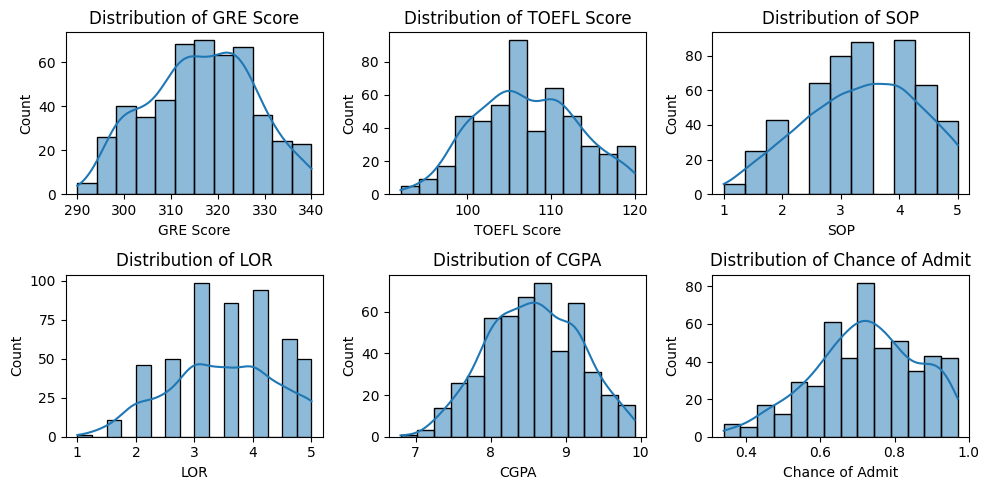

In [55]:
plt.figure(figsize=(10, 5))

all_columns = data.columns.tolist()

cat_columns = ['Research', 'University Rating']

num_columns = [col for col in all_columns if col not in cat_columns]

for i, col in enumerate(num_columns):
  plt.subplot(2, 3, i + 1)
  sns.histplot(data, x=col, kde=True)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Insights:**

**GRE Score**

Distribution is roughly normal, centered around 310–320.
Very few students have scores below 290 or above 340.
Suggests most applicants are competitive.

**TOEFL Score**

Strong clustering between 100–115.
Almost no values below 90, meaning applicants generally have good English
proficiency.

**SOP (Statement of Purpose Rating)**

Values are between 1–5.
Most applicants rated 3–4, very few rated 1.
Indicates most SOPs are of average/good quality.

**LOR (Letter of Recommendation Rating)**

Similar to SOP, values between 1–5.
Heavily clustered at 3–4, very few weak recommendations.

**CGPA**

Skewed towards the higher side.
Most students have 7.5–9.5, with many above 9.
Shows applicants are academically strong.

**Chance of Admit**

Distribution leans toward the higher side.
Many students have chances between 0.7–0.9, fewer below 0.5.
Suggests dataset is biased toward stronger candidates.

Most applicants are already strong: high GRE, TOEFL, CGPA, and research
experience.
SOP & LOR are usually rated average to good, meaning they might not
differentiate applicants much.
“Chance of Admit” distribution shows dataset bias toward high-probability
admits.


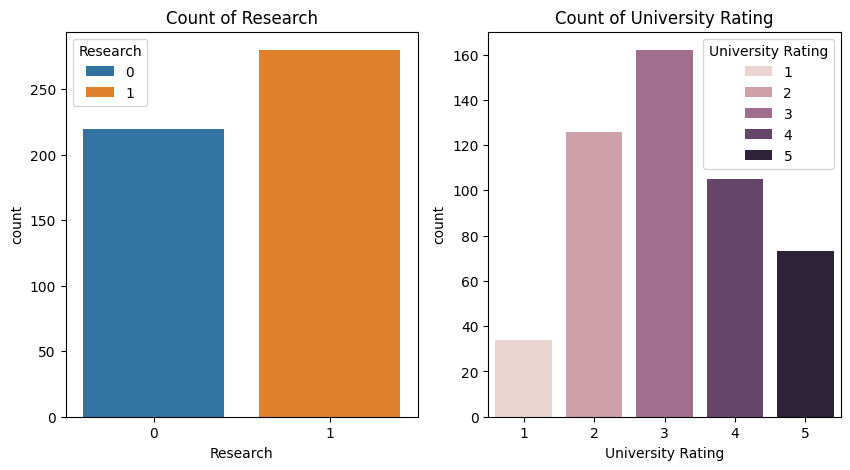

In [53]:
plt.figure(figsize=(10, 5))
for i,col in enumerate(cat_columns):
  plt.subplot(1,2,i+1)
  sns.countplot(data=data,x=col,hue=col)
  plt.title(f'Count of {col}')

**Insights:**

**University Rating**

Values range 1–5.
Most applicants target universities rated 3–4, very few at 1 or 5.
Mid-tier universities dominate in this dataset.

**Research**

Binary (0 = No Research, 1 = Research).
Majority of applicants have research experience (1).
This may play an important role in admissions.


# 3.2 Bivariate Analysis

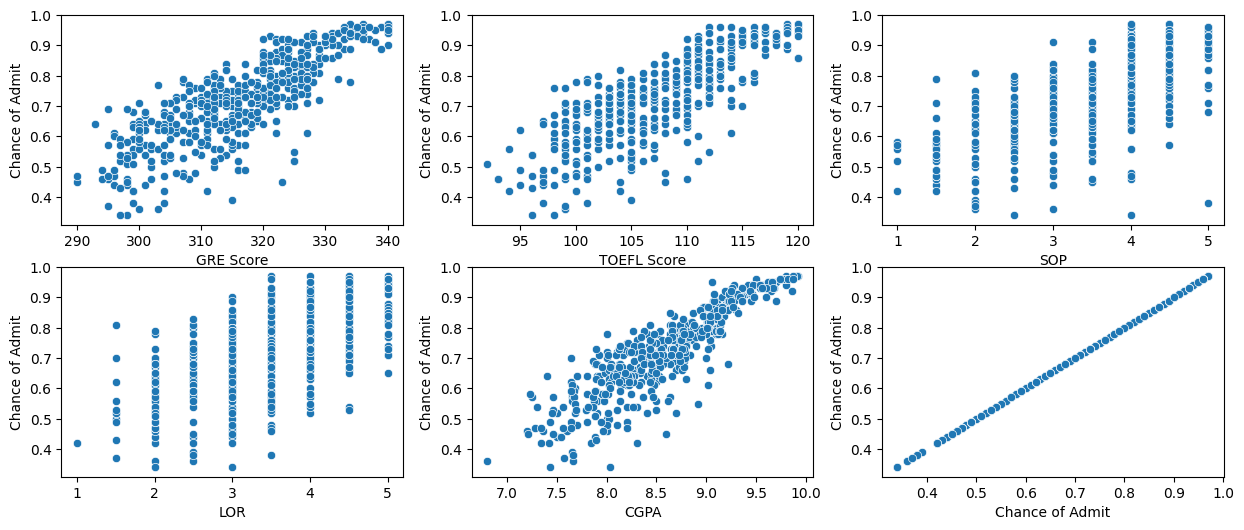

In [64]:
plt.figure(figsize=(15,6))
for i,col in enumerate(num_columns):
  plt.subplot(2,3,i+1)
  sns.scatterplot(data=data,x=col,y='Chance of Admit')

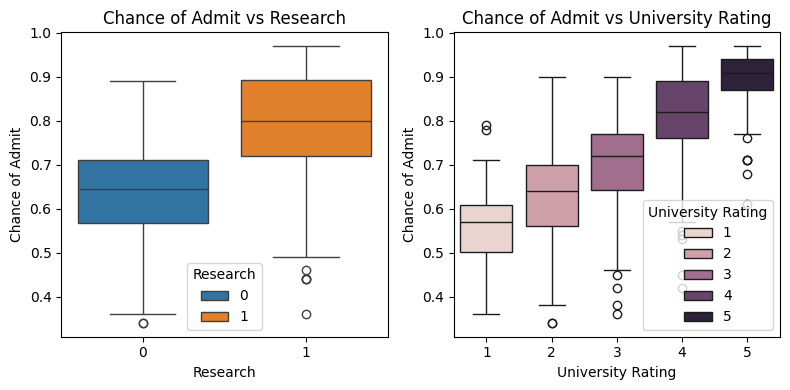

In [67]:
plt.figure(figsize=(8, 4))
for i, col in enumerate(cat_columns, 1):
 plt.subplot(1, 2, i)
 sns.boxplot(x=col, y="Chance of Admit", data=data,hue=col)
 plt.title(f"Chance of Admit vs {col}")
plt.tight_layout()
plt.show()


**Insights:**

**GRE & TOEFL:** Strong positive correlation with Chance of Admit (higher scores →
higher admit chance).

**CGPA:** Very strong correlation, candidates with >9 CGPA usually have >0.8
chance.

**SOP & LOR:** Weak-to-moderate positive correlation (they help, but not as much
as GRE/CGPA).

**University Rating:** Higher rating - slightly higher admit chances.

**Research:** Research experience clearly shifts admit probability upward.


# 4. Data Preprocessing

In [69]:
data.duplicated().sum()

np.int64(0)

In [70]:
data.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


# 5. Correlation among independent variables


<Axes: >

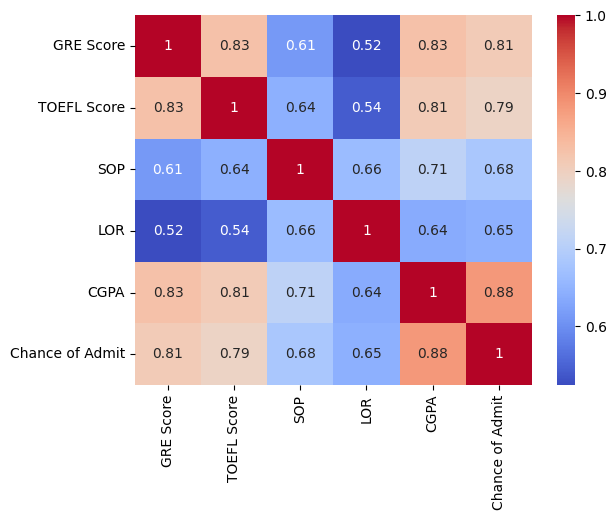

In [72]:
sns.heatmap(data[num_columns].corr(),annot=True,cmap='coolwarm')

**Insights:**

**CGPA** - highest correlation with Chance of Admit (around 0.87).

**GRE Score** - strong correlation (around 0.8).

**TOEFL Score** - also strong (around 0.79).

**SOP & LOR** - moderate (~0.6).

**Research** - positively correlated (~0.55), showing clear benefit.

**University Rating** - weaker but still positive (~0.65).

**GRE Score, TOEFL Score, and CGPA** are moderately correlated with each
other (~0.7–0.8).

Makes sense: strong students tend to score well in all areas.

**SOP & LOR** are correlated (~0.7) - students with strong SOPs usually also
have strong recommendations.
Research is weakly correlated with others (independent variable).

**Conclusion:**
Academic strength (CGPA, GRE, TOEFL) is the biggest driver, while Research &
University Rating also contribute. SOP and LOR matter, but not as strongly.

No pair of independent variables has a correlation above 0.90.
So, we do not need to drop any feature because there isn’t dangerous
multicollinearity in this dataset.


# 6. Prepare the data for modeling.


In [74]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = data.drop('Chance of Admit',axis=1)
y = data['Chance of Admit']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

X_train_scaled.shape,X_test_scaled.shape

((400, 7), (100, 7))

**Summary of Data Preparation Steps:**

**Data Examination:** Confirmed that all variables are numerical and identified
the target variable.

**Feature-Target Separation:**

Features: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research

Target: Chance of Admit

**Train-Test Split:**

80% training data (400 samples)

20% test data (100 samples)

Random state set to 42 for reproducibility

**Feature Scaling:**

Used StandardScaler for standardization (mean=0, std=1)

Scaling fitted only on training data to avoid data leakage

Both training and test sets transformed using the same scaler

**No Categorical Encoding Needed:**
All variables are already numerically
encoded.

The data is now properly prepared for modeling with:

Properly scaled features

No data leakage between train and test sets

Clear separation of features and target variable

Appropriate train-test split for model evaluation

The prepared data can now be used for various regression models to predict
admission chances based on the academic profile features.


# 7. Build the Linear Regression model.

In [76]:
import statsmodels.api as sm

# Prepare the data for statsmodels (add constant for intercept)
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

print("="*60)
print("LINEAR REGRESSION MODEL WITH STATSMODELS")
print("="*60)

# 1. Build the initial Linear Regression model
print("\n1. INITIAL MODEL WITH ALL FEATURES")
print("-" * 40)

# Reset index to align
X_train_sm = X_train_sm.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the OLS model
model_initial = sm.OLS(y_train, X_train_sm).fit()

# Display model summary
print(model_initial.summary())

LINEAR REGRESSION MODEL WITH STATSMODELS

1. INITIAL MODEL WITH ALL FEATURES
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          3.41e-142
Time:                        07:07:21   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------

In [86]:
# 2. Display model coefficients with column names
print("\n2. MODEL COEFFICIENTS")
print("-" * 40)
coefficients_df = pd.DataFrame({
 'Feature': X_train_sm.columns,
 'Coefficient': model_initial.params,
 'P-value': model_initial.pvalues,
 'Significant': model_initial.pvalues < 0.05
})
coefficients_df.round(4)



2. MODEL COEFFICIENTS
----------------------------------------


,Feature,Coefficient,P-value,Significant
const,const,0.7242,0.0000,True
GRE Score,GRE Score,0.0267,0.0000,True
TOEFL Score,TOEFL Score,0.0182,0.0016,True
University Rating,University Rating,0.0029,0.5414,False
SOP,SOP,0.0018,0.7212,False
LOR,LOR,0.0159,0.0002,True
CGPA,CGPA,0.0676,0.0000,True
Research,Research,0.0119,0.0013,True


In [87]:
# 3. Identify features with p-value > 0.05
insignificant_features = coefficients_df[coefficients_df['P-value'] > 0.05]['Feature']
insignificant_features = [f for f in insignificant_features if f != 'const']
print(f"\n3. INSIGNIFICANT FEATURES (p-value > 0.05): {insignificant_features}")


3. INSIGNIFICANT FEATURES (p-value > 0.05): ['University Rating', 'SOP']


In [88]:
# 4. Drop insignificant features and re-train the model
print("\n4. REFINED MODEL (DROPPING INSIGNIFICANT FEATURES)")
print("-" * 40)

if insignificant_features:
  # Create new feature sets without insignificant features
  X_train_refined = X_train_sm.drop(insignificant_features, axis=1)
  X_test_refined = X_test_sm.drop(insignificant_features, axis=1)

  # Fit the refined model
  model_refined = sm.OLS(y_train, X_train_refined).fit()

  # Display refined model summary
  print(model_refined.summary())

  # Display refined coefficients
  print("\nREFINED MODEL COEFFICIENTS")

  print("-" * 30)

  refined_coefficients = pd.DataFrame({
  'Feature': X_train_refined.columns,
  'Coefficient': model_refined.params,
  'P-value': model_refined.pvalues,
  'Significant': model_refined.pvalues < 0.05
  })
  print(refined_coefficients.round(4))
else:
    print("No insignificant features to drop. Initial model is already optimized'")
    model_refined = model_initial
    X_train_refined = X_train_sm
    X_test_refined = X_test_sm


4. REFINED MODEL (DROPPING INSIGNIFICANT FEATURES)
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Mon, 23 Feb 2026   Prob (F-statistic):          1.36e-144
Time:                        07:20:29   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

**Key Points from the Linear Regression Analysis:**

**Model Statistics Interpretation:**

**R-squared:** Measures the proportion of variance in the target variable explained by the model

**Adj. R-squared:** Adjusted for number of predictors, prevents overfitting

**F-statistic:** Tests if the model is better than using the mean

**P-values:** Identify statistically significant features (p < 0.05)

**Feature Significance:** Features with p-value > 0.05 are considered statistically
insignificant

These features are dropped to create a more parsimonious model

# 8. Testing the assumptions of linear regression.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.diagnostic import het_goldfeldquandt
from scipy import stats

# VIF

In [96]:
print("\n" + "="*50)
print("a. MULTICOLLINEARITY CHECK (VIF ANALYSIS)")
print("="*50)

vif_df = pd.DataFrame()
X = X_train_refined.drop('const',axis=1)
vif_df['Features'] = X.columns
vif_df['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
print(vif_df)


a. MULTICOLLINEARITY CHECK (VIF ANALYSIS)
      Features       VIF
0    GRE Score  4.471557
1  TOEFL Score  3.540082
2          LOR  1.655867
3         CGPA  4.281365
4     Research  1.504670


No features needed to be removed for multicollinearity.

# Mean of Residuals

In [101]:
residuals = y_train - model_refined.predict(X_train_refined)
np.mean(residuals)

np.float64(-4.2063574845485617e-16)

In [100]:
# b. MEAN OF RESIDUALS CHECK
print("\n" + "="*50)
print("b. MEAN OF RESIDUALS CHECK")
print("="*50)
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
print(f"Mean of residuals: {residuals_mean:.6f}")
print(f"Standard deviation of residuals: {residuals_std:.4f}")
print(f"Is mean close to zero? {abs(residuals_mean) < 0.01}")
# Statistical test for mean = 0
t_stat, p_value = stats.ttest_1samp(residuals, 0)
print(f"T-test for mean = 0: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
print(f"Statistical evidence that mean ≠ 0? {p_value < 0.05}")



b. MEAN OF RESIDUALS CHECK
Mean of residuals: -0.000000
Standard deviation of residuals: 0.0594
Is mean close to zero? True
T-test for mean = 0: t-statistic = -0.0000, p-value = 1.0000
Statistical evidence that mean ≠ 0? False


# Test for Homoscedasticity


d. HOMOSCEDASTICITY CHECK


/tmp/ipython-input-1682270565.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


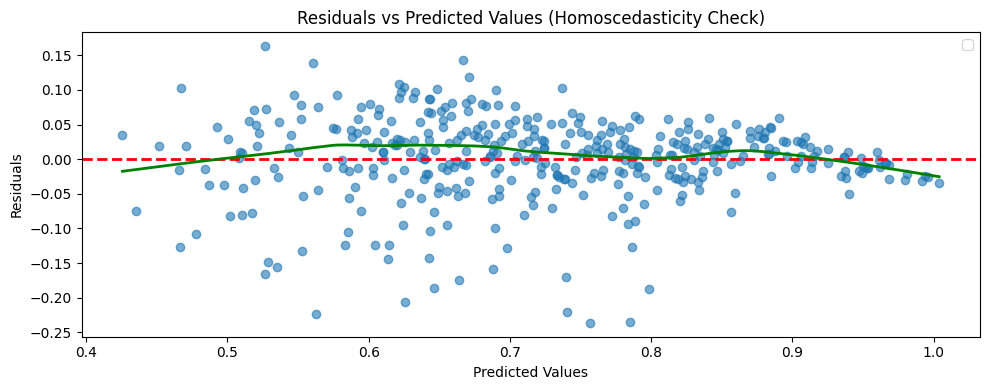

Goldfeld-Quandt Test for Homoscedasticity:
G-Q Test Statistic: 0.9592
G-Q Test p-value: 0.6139
✓ No strong evidence of heteroscedasticity (p > 0.05)
✓ Homoscedasticity assumption is validated


In [105]:
#HOMOSCEDASTICITY CHECK
print("\n" + "="*50)
print("d. HOMOSCEDASTICITY CHECK")
print("="*50)

y_pred = model_refined.predict(X_train_refined)

# 1. Residuals vs Predicted values plot
plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')


# Add a lowess smooth line to see trend
try:
 import statsmodels.nonparametric.smoothers_lowess as lowess
 lowess_line = lowess.lowess(residuals, y_pred, frac=0.3)
 plt.plot(lowess_line[:, 0], lowess_line[:, 1], 'green', linewidth=2)
 plt.legend()
except:
 pass
plt.tight_layout()
plt.show()


# 2. Goldfeld-Quandt Test
print("Goldfeld-Quandt Test for Homoscedasticity:")
gq_test = het_goldfeldquandt(residuals, X_train_refined)
gq_statistic, gq_pvalue = gq_test[0], gq_test[1]
print(f"G-Q Test Statistic: {gq_statistic:.4f}")
print(f"G-Q Test p-value: {gq_pvalue:.4f}")
if gq_pvalue > 0.05:
 print("✓ No strong evidence of heteroscedasticity (p > 0.05)")
 print("✓ Homoscedasticity assumption is validated")
else:
 print("✗ Evidence of heteroscedasticity detected (p ≤ 0.05)")
 print("✗ Homoscedasticity assumption may be violated")


# Normality of residuals


c. NORMALITY OF RESIDUALS CHECK


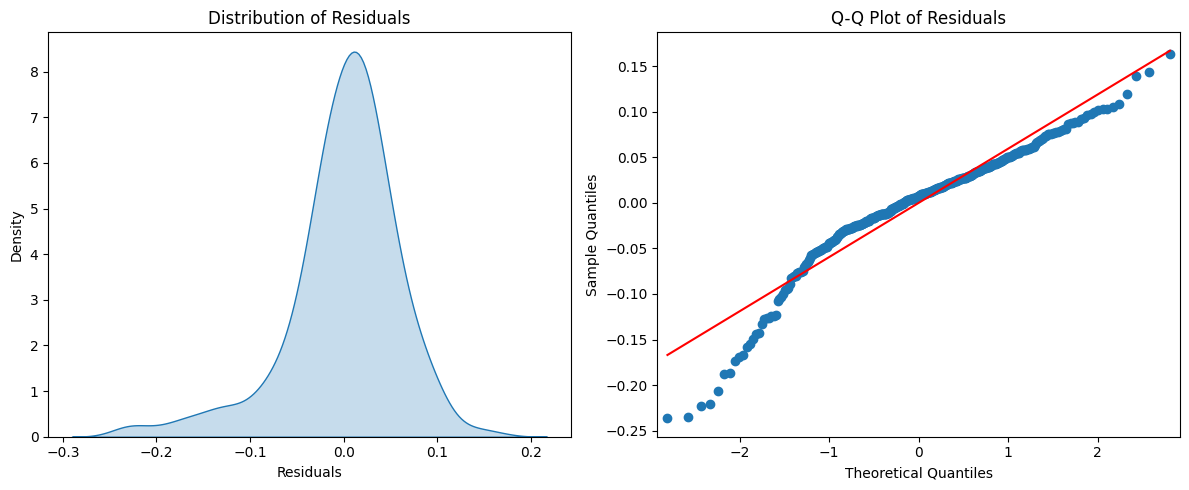

Shapiro-Wilk Test Statistic: 0.9313
Shapiro-Wilk Test p-value: 0.0000
✗ Evidence against normality detected (p ≤ 0.05)
✗ Normality assumption may be violated


In [106]:
# c. NORMALITY OF RESIDUALS CHECK
print("\n" + "="*50)
print("c. NORMALITY OF RESIDUALS CHECK")
print("="*50)

# 1. KDE Plot of Residuals
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(residuals, fill=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# 2. Q-Q Plot of Residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.tight_layout()
plt.show()

# 3. Shapiro-Wilk Test for Normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}")
print(f"Shapiro-Wilk Test p-value: {shapiro_pvalue:.4f}")
if shapiro_pvalue > 0.05:
    print("✓ No strong evidence against normality (p > 0.05)")
    print("✓ Normality assumption is validated")
else:
    print("✗ Evidence against normality detected (p ≤ 0.05)")
    print("✗ Normality assumption may be violated")

**Key Assumptions Tested:**

**a. Multicollinearity (VIF)**
VIF > 5 indicates high multicollinearity
Features are iteratively removed until all VIF < 5

**b. Mean of Residuals ≈ 0** Residuals should be randomly distributed around
zero
Statistical test confirms if mean is significantly different from zero

**c. Homoscedasticity** Residuals vs Predicted plot should show constant
variance
Goldfeld-Quandt test provides statistical evidence

**d. Normality of Residuals** Histogram should show bell-shaped curve
Q-Q plot points should follow the 45-degree line

Multiple statistical tests confirm normality
This comprehensive testing ensures the linear regression model is valid and the
results are reliable for interpretation.


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training and test sets
y_train_pred = model_refined.predict(X_train_refined)
y_test_pred = model_refined.predict(X_test_refined)

print("="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

# --- Training Set Evaluation ---
print("\n--- Training Set Metrics ---")
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

n = len(y_train)  # Number of observations
p = X_train_refined.shape[1] - 1  # Number of predictors (excluding constant)
adj_r2_train = 1 - ((1 - r2_train) * (n - 1)) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R2): {r2_train:.4f}")
print(f"Adjusted R-squared: {adj_r2_train:.4f}")

# --- Test Set Evaluation ---
print("\n--- Test Set Metrics ---")
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

n_test = len(y_test)  # Number of observations in test set
p_test = X_test_refined.shape[1] - 1  # Number of predictors (excluding constant)
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - p_test - 1)

print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R2): {r2_test:.4f}")
print(f"Adjusted R-squared: {adj_r2_test:.4f}")

MODEL PERFORMANCE EVALUATION

--- Training Set Metrics ---
Mean Absolute Error (MAE): 0.0427
Root Mean Squared Error (RMSE): 0.0594
R-squared (R2): 0.8207
Adjusted R-squared: 0.8185

--- Test Set Metrics ---
Mean Absolute Error (MAE): 0.0429
Root Mean Squared Error (RMSE): 0.0614
R-squared (R2): 0.8155
Adjusted R-squared: 0.8057


## Summarize Model Performance



### Model Performance Summary

**1. Training Set Metrics:**
*   **Mean Absolute Error (MAE):** 0.0427
*   **Root Mean Squared Error (RMSE):** 0.0594
*   **R-squared (R2):** 0.8207
*   **Adjusted R-squared:** 0.8185

**2. Test Set Metrics:**
*   **Mean Absolute Error (MAE):** 0.0429
*   **Root Mean Squared Error (RMSE):** 0.0614
*   **R-squared (R2):** 0.8155
*   **Adjusted R-squared:** 0.8057

**Interpretation:**

**Accuracy (MAE & RMSE):**
*   The MAE values (0.0427 on training, 0.0429 on test) indicate that, on average, the model's predictions for 'Chance of Admit' are off by approximately 0.04 (or 4 percentage points) from the actual values. This is a relatively small error, suggesting good accuracy.
*   The RMSE values (0.0594 on training, 0.0614 on test) are slightly higher than MAE, as RMSE penalizes larger errors more. Still, these values are low, reinforcing the model's good accuracy.

**Model Fit (R-squared & Adjusted R-squared):**
*   The R-squared value of approximately 0.82 on the training set means that about 82% of the variance in the 'Chance of Admit' can be explained by the independent variables in the model. This indicates a strong fit to the training data.
*   The Adjusted R-squared is very close to the R-squared, suggesting that the selected features are contributing meaningfully to the model.

**Generalization Ability & Overfitting/Underfitting:**
*   Comparing the training and test set metrics, we observe very similar performance:
    *   MAE: 0.0427 (train) vs 0.0429 (test)
    *   RMSE: 0.0594 (train) vs 0.0614 (test)
    *   R-squared: 0.8207 (train) vs 0.8155 (test)
    *   Adjusted R-squared: 0.8185 (train) vs 0.8057 (test)
*   The close proximity of these metrics across both sets suggests that the model **generalizes well** to unseen data. There is no significant drop in performance from the training set to the test set, which indicates that the model is **not overfitting** to the training data. The model is also not underfitting, as the performance metrics are quite high.

**Conclusion:**
Overall, the Linear Regression model demonstrates strong predictive power and good generalization ability. The low error rates (MAE, RMSE) and high explained variance (R-squared) on both training and test sets indicate that the model is robust and can reliably predict the 'Chance of Admit' based on the given features.

## Identify Key Factors



In [108]:
significant_features_df = refined_coefficients[refined_coefficients['Significant'] == True].copy()
significant_features_df = significant_features_df[significant_features_df['Feature'] != 'const']
print("Significant Features and their Coefficients:")
print(significant_features_df)

Significant Features and their Coefficients:
                 Feature  Coefficient       P-value  Significant
GRE Score      GRE Score     0.026879  2.731841e-05         True
TOEFL Score  TOEFL Score     0.019106  7.667483e-04         True
LOR                  LOR     0.017207  1.045150e-05         True
CGPA                CGPA     0.069066  2.882599e-25         True
Research        Research     0.012226  9.557871e-04         True


In [109]:
ranked_features = significant_features_df.copy()
ranked_features['Abs_Coefficient'] = ranked_features['Coefficient'].abs()
ranked_features = ranked_features.sort_values(by='Abs_Coefficient', ascending=False)
print("\nRanked Significant Features by Absolute Coefficient Magnitude:")
print(ranked_features[['Feature', 'Coefficient', 'Abs_Coefficient', 'P-value']])


Ranked Significant Features by Absolute Coefficient Magnitude:
                 Feature  Coefficient  Abs_Coefficient       P-value
CGPA                CGPA     0.069066         0.069066  2.882599e-25
GRE Score      GRE Score     0.026879         0.026879  2.731841e-05
TOEFL Score  TOEFL Score     0.019106         0.019106  7.667483e-04
LOR                  LOR     0.017207         0.017207  1.045150e-05
Research        Research     0.012226         0.012226  9.557871e-04


### Key Factors Influencing 'Chance of Admit'

Based on the refined Linear Regression model, the following features have a statistically significant impact on the 'Chance of Admit' (p-value < 0.05). The features are ranked by the absolute magnitude of their coefficients, indicating their relative importance.

**1. CGPA (Cumulative Grade Point Average)**
*   **Coefficient:** 0.0691
*   **Impact:** Positive. For every one-unit increase in CGPA (after scaling), the 'Chance of Admit' increases by approximately 0.0691 (or 6.91 percentage points), holding other factors constant. This is the strongest predictor.

**2. GRE Score (Graduate Record Examinations Score)**
*   **Coefficient:** 0.0269
*   **Impact:** Positive. A one-unit increase in GRE score (after scaling) is associated with an approximate 0.0269 (or 2.69 percentage points) increase in 'Chance of Admit'.

**3. TOEFL Score (Test of English as a Foreign Language Score)**
*   **Coefficient:** 0.0191
*   **Impact:** Positive. A one-unit increase in TOEFL score (after scaling) is associated with an approximate 0.0191 (or 1.91 percentage points) increase in 'Chance of Admit'.

**4. LOR (Letter of Recommendation Strength)**
*   **Coefficient:** 0.0172
*   **Impact:** Positive. A one-unit increase in LOR rating (after scaling) is associated with an approximate 0.0172 (or 1.72 percentage points) increase in 'Chance of Admit'.

**5. Research (Research Experience)**
*   **Coefficient:** 0.0122
*   **Impact:** Positive. Having research experience (1 vs 0, after scaling) is associated with an approximate 0.0122 (or 1.22 percentage points) increase in 'Chance of Admit'.

**Features found to be insignificant and dropped from the refined model:**
*   **University Rating:** Had a p-value > 0.05, indicating no statistically significant impact on 'Chance of Admit' in this model.
*   **SOP (Statement of Purpose Strength):** Also had a p-value > 0.05, suggesting it does not significantly influence 'Chance of Admit' based on this dataset and model.

**Summary of Relative Importance:**
1.  **CGPA**
2.  **GRE Score**
3.  **TOEFL Score**
4.  **LOR**
5.  **Research**

This analysis clearly shows that academic performance (CGPA, GRE, TOEFL) are the most crucial factors, followed by the strength of recommendations and having research experience.

## Review Model Assumptions




## Review Model Assumptions

### Summary of Assumption Checks:

**1. Multicollinearity (VIF Analysis):**
*   **Finding:** All VIF values are well below 5 (e.g., GRE Score: 4.47, TOEFL Score: 3.54, CGPA: 4.28, LOR: 1.66, Research: 1.50).
*   **Conclusion:** The assumption of **no significant multicollinearity is met**. There is no strong correlation between the independent variables that would destabilize the model coefficients.

**2. Mean of Residuals:**
*   **Finding:** The mean of residuals is approximately -0.000000, and the t-test p-value is 1.0000.
*   **Conclusion:** The assumption that the **mean of residuals is close to zero is met**. Statistically, there is no evidence that the mean of the residuals is different from zero.

**3. Homoscedasticity:**
*   **Finding:** The Goldfeld-Quandt Test p-value is 0.6139 (> 0.05). The Residuals vs Predicted Values plot shows a relatively random scatter of points around zero, without a clear pattern or fan shape.
*   **Conclusion:** The assumption of **homoscedasticity (constant variance of residuals) is met**. There is no strong evidence of heteroscedasticity.

**4. Normality of Residuals:**
*   **Finding:** The Shapiro-Wilk Test p-value is 0.0000 (< 0.05). The KDE plot of residuals shows a somewhat skewed distribution, not perfectly bell-shaped. The Q-Q plot shows that the points deviate significantly from the 45-degree line, particularly at the tails.
*   **Conclusion:** The assumption of **normality of residuals is violated**. The p-value from the Shapiro-Wilk test is highly significant, indicating that the residuals are not normally distributed. This is visually supported by the KDE and Q-Q plots.

**Overall Model Assumption Review:**

The linear regression model successfully satisfies the assumptions of no significant multicollinearity, zero mean of residuals, and homoscedasticity. However, the crucial assumption of **normality of residuals is violated**. While linear regression models are robust to minor deviations from normality, a significant violation (as indicated by the Shapiro-Wilk test and visual plots) can affect the validity of statistical inferences (e.g., p-values, confidence intervals). The model coefficients themselves and the overall predictive accuracy (R-squared) may still be reliable, but caution should be exercised when interpreting the statistical significance of individual predictors based solely on p-values from this model.

## Formulate Actionable Insights



### Actionable Insights for Students and Universities

Based on the Exploratory Data Analysis (EDA), correlation analysis, and the refined Linear Regression model, we can derive several actionable insights regarding graduate admissions:

**Key Factors Influencing 'Chance of Admit' (Ranked by Impact):**

1.  **CGPA** (Coefficient: 0.069, p-value: ~0.000): This is the strongest predictor. A higher CGPA significantly increases the chance of admission. EDA showed a strong positive correlation, and the model confirms its primary importance.
2.  **GRE Score** (Coefficient: 0.027, p-value: ~0.000): A crucial factor, though less impactful than CGPA. Strong GRE scores are highly beneficial. EDA indicated a generally competitive applicant pool with good GRE scores.
3.  **TOEFL Score** (Coefficient: 0.019, p-value: ~0.001): Essential for demonstrating English proficiency. While important, its impact is slightly less than GRE. EDA highlighted that applicants generally have high TOEFL scores, suggesting a baseline proficiency is expected.
4.  **LOR (Letter of Recommendation)** (Coefficient: 0.017, p-value: ~0.000): Strong letters of recommendation contribute positively. This suggests that the quality of recommendations from faculty who know the applicant well can make a difference.
5.  **Research Experience** (Coefficient: 0.012, p-value: ~0.001): Having research experience significantly boosts admission chances. EDA showed a majority of applicants had research experience, underscoring its importance in this competitive dataset.

**Factors with Insignificant Statistical Impact (Based on p-values > 0.05 in the refined model):**

*   **University Rating:** While EDA and bivariate analysis showed a slight positive trend (higher rating, slightly higher admit chances), the linear model found it not statistically significant when accounting for other factors. This might imply that other academic metrics often correlate with applying to higher-rated universities.
*   **SOP (Statement of Purpose):** Similar to University Rating, the model found SOP not to be statistically significant. While a strong SOP is intuitively important, its quantified rating in this dataset did not show a direct, independent statistical impact on the 'Chance of Admit' in the final model.

---

### Recommendations:

**For Students Applying to Graduate School:**

1.  **Prioritize Academic Excellence (CGPA):** Your undergraduate academic performance, reflected in your CGPA, is the single most critical factor. Focus on maintaining a high CGPA throughout your studies.
2.  **Excel in Standardized Tests (GRE & TOEFL):** Dedicate significant effort to preparing for and achieving high GRE and TOEFL scores. These are strong indicators of your academic potential and English proficiency, respectively.
3.  **Seek Strong Letters of Recommendation:** Cultivate relationships with professors who know your work well and can write specific, compelling letters of recommendation. Quality over quantity is key here.
4.  **Gain Research Experience:** Actively seek out research opportunities. Even if not mandatory, having research experience provides a notable advantage and signals readiness for graduate-level study.
5.  **While SOP and University Rating are not directly statistically significant in this model, they are still important contextual factors.** Craft a thoughtful SOP that showcases your motivations and fit for the program. Applying to universities that align with your profile, and aiming for the highest university rating you can realistically get into based on your profile, is still a good strategy.

**For Universities Reviewing Applications:**

1.  **Emphasize Academic Record:** CGPA, GRE, and TOEFL scores are highly reliable predictors of admission success. Continue to weigh these academic metrics heavily in the evaluation process.
2.  **Value Research Experience:** Applicants with prior research experience tend to have a higher chance of admission. Consider giving extra weight to research contributions, as they indicate preparedness for graduate-level work.
3.  **Scrutinize Letters of Recommendation:** The LORs provide valuable insights. Look for specific examples and strong endorsements that speak to an applicant's potential and suitability for your program.
4.  **Re-evaluate the Role of SOP and University Rating:** If these factors are being given significant weight, it might be beneficial to assess if their current evaluation method truly captures their impact or if other, more statistically significant factors are being overshadowed. The current model suggests their direct, independent impact might be less than often perceived, though they can still contribute to a holistic review.
5.  **Holistic Review with Data-Driven Insights:** While this model highlights key statistical predictors, admissions committees should continue a holistic review, keeping in mind that quantitative models are tools to guide, not solely dictate, decisions. However, these insights can help in identifying candidates with the highest statistical probability of admission.